# vertical velocity

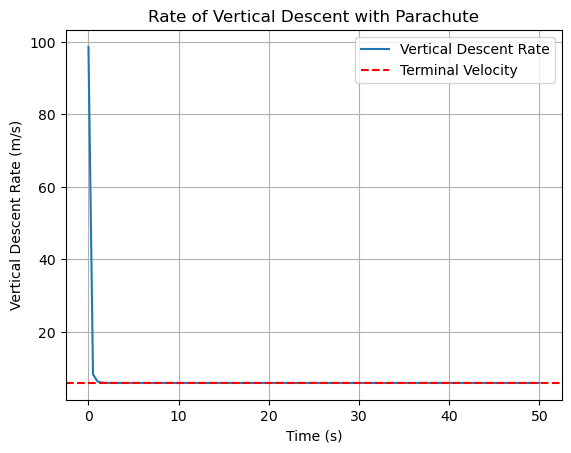

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
mass = 75  # kg
cross_sectional_area = 20  # m^2
drag_coefficient = 1.75
air_density = 1.2
initial_velocity = 98.65  # m/s
initial_height = 1000  # meters
terminal_velocity = 5.92  # m/s

# Define the differential equation
def model(v, t):
    # Calculate drag force
    drag_force = 0.5 * drag_coefficient * cross_sectional_area * air_density * v**2
    
    # Calculate net force
    net_force = mass * 9.8 - drag_force
    
    # Calculate acceleration
    acceleration = net_force / mass
    
    return acceleration

# Time points
t = np.linspace(0, 50, 100)  # Adjust the time range accordingly

# Solve the differential equation
v = odeint(model, initial_velocity, t)

# Plot the rate of descent
plt.plot(t, v[:, 0], label='Vertical Descent Rate')
plt.axhline(y=terminal_velocity, color='r', linestyle='--', label='Terminal Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Vertical Descent Rate (m/s)')
plt.title('Rate of Vertical Descent with Parachute')
plt.legend()
plt.grid(True)
plt.show()

# 3000 to 1000 meters

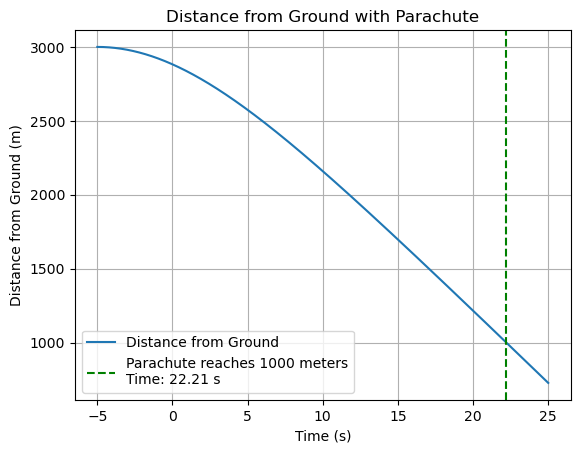

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
mass = 75  # kg
cross_sectional_area = 0.18  # m^2
drag_coefficient = 0.7
air_density = 1.2
initial_velocity = 0  # m/s
initial_height = 3000  # meters
terminal_velocity = 5.92  # m/s

# Define the differential equation
def model(v, t):
    # Calculate drag force
    drag_force = 0.5 * drag_coefficient * cross_sectional_area * air_density * v**2
    
    # Calculate net force
    net_force = mass * 9.8 - drag_force
    
    # Calculate acceleration
    acceleration = net_force / mass
    
    return acceleration

# Time points
t = np.linspace(-5, 25, 10000)  # Adjust the time range accordingly

# Solve the differential equation
v = odeint(model, initial_velocity, t)

# Integrate velocity to obtain distance from the ground
distance_from_ground = initial_height - np.cumsum(v[:, 0]) * (t[1] - t[0])

# Find the time when the parachute lands
landing_time_index = np.argmax(distance_from_ground <= 1000)
time_to_ground = t[landing_time_index]

# Plot the distance from the ground
plt.plot(t, distance_from_ground, label='Distance from Ground')
plt.axvline(x=time_to_ground, color='g', linestyle='--', label=f'Parachute reaches 1000 meters\nTime: {time_to_ground:.2f} s')
plt.xlabel('Time (s)')
plt.ylabel('Distance from Ground (m)')
plt.title('Distance from Ground with Parachute')
plt.legend()
plt.grid(True)
plt.show()

# 1000 to 0 meters

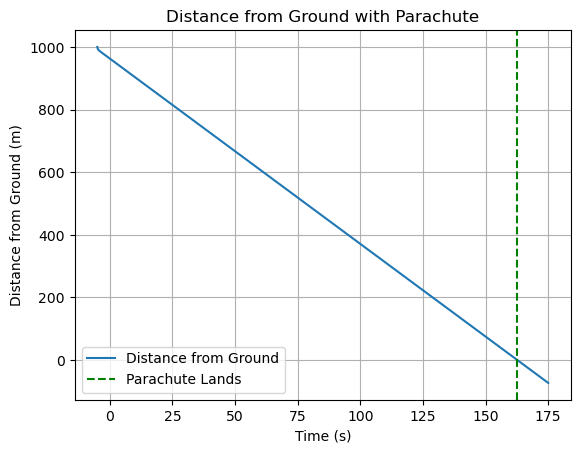

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
mass = 75  # kg
cross_sectional_area = 20  # m^2
drag_coefficient = 1.75
air_density = 1.2
initial_velocity = 98.65  # m/s
initial_height = 1000  # meters
terminal_velocity = 5.92  # m/s

# Define the differential equation
def model(v, t):
    # Calculate drag force
    drag_force = 0.5 * drag_coefficient * cross_sectional_area * air_density * v**2
    
    # Calculate net force
    net_force = mass * 9.8 - drag_force
    
    # Calculate acceleration
    acceleration = net_force / mass
    
    return acceleration

# Time points
t = np.linspace(-5, 175, 100000)  # Adjust the time range accordingly

# Solve the differential equation
v = odeint(model, initial_velocity, t)

# Integrate velocity to obtain distance from the ground
distance_from_ground = initial_height - np.cumsum(v[:, 0]) * (t[1] - t[0])

# Find the time when the parachute lands
landing_time_index = np.argmax(distance_from_ground <= 0)

# Plot the distance from the ground
plt.plot(t, distance_from_ground, label='Distance from Ground')
plt.axvline(x=t[landing_time_index], color='g', linestyle='--', label='Parachute Lands')
plt.xlabel('Time (s)')
plt.ylabel('Distance from Ground (m)')
plt.title('Distance from Ground with Parachute')
plt.legend()
plt.grid(True)
plt.show()

# Northbound velocity

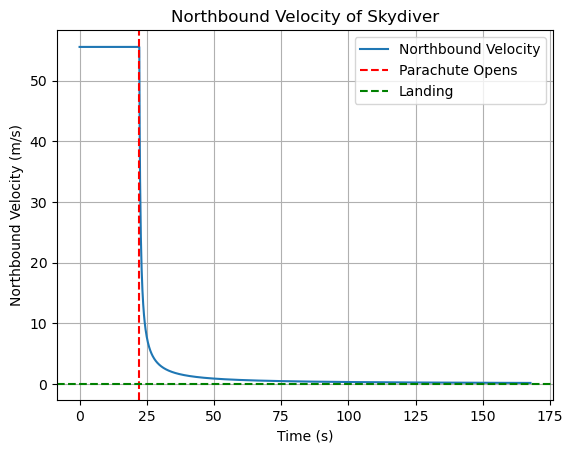

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
mass = 75  # kg
initial_plane_speed = 200 / 3.6  # Initial speed of the plane converted to m/s
parachute_opening_time = 22.21  # seconds
parachute_opening_height = 1000  # meters
parachute_effective_area = 5  # m^2
air_density = 1.2
initial_height = 3000  # meters
terminal_velocity = 98.65  # m/s

# Time points
t1 = np.linspace(0, parachute_opening_time, 1000)  # Time before parachute opening
t2 = np.linspace(parachute_opening_time, 167.7, 1000)  # Time after parachute opening
t = np.concatenate((t1, t2))

# Define the differential equation for northbound velocity before parachute opening
def model1(v, t):
    # Initial acceleration due to the northbound motion of the plane
    plane_acceleration = 0
    
    # Calculate drag force without cross-sectional area initially
    drag_force = 0
    
    # Calculate net force considering the northbound motion
    net_force = -drag_force  # Negative sign for northbound direction
    acceleration = net_force / mass
    
    return acceleration + plane_acceleration

# Define the differential equation for northbound velocity after parachute opening
def model2(v, t):
    # Calculate drag force with effective parachute area
    drag_force = 0.5 * air_density * parachute_effective_area * v**2
    
    # Calculate net force considering the northbound motion
    net_force = -drag_force  # Negative sign for northbound direction
    acceleration = net_force / mass
    
    return acceleration

# Solve the differential equations
v1 = odeint(model1, initial_plane_speed, t1)
v2 = odeint(model2, v1[-1, 0], t2)  # Use the final velocity of the first part as initial velocity for the second part
v = np.concatenate((v1, v2))

# Plot the northbound velocity
plt.plot(t, v, label='Northbound Velocity')
plt.axvline(x=parachute_opening_time, color='r', linestyle='--', label='Parachute Opens')
plt.axhline(y=0, color='g', linestyle='--', label='Landing')
plt.xlabel('Time (s)')
plt.ylabel('Northbound Velocity (m/s)')
plt.title('Northbound Velocity of Skydiver')
plt.legend()
plt.grid(True)
plt.show()

# Northbound displacvement

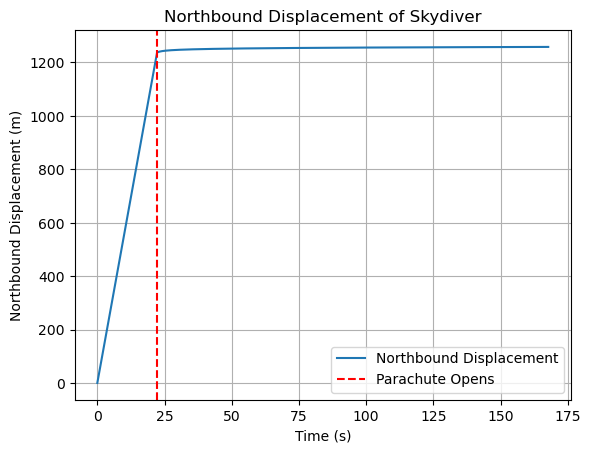

Total Distance Traveled: 1257.84 meters


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
mass = 75  # kg
initial_plane_speed = 200 / 3.6  # Initial speed of the plane converted to m/s
parachute_opening_time = 22.21  # seconds
parachute_opening_height = 1000  # meters
parachute_effective_area = 5  # m^2
air_density = 1.2
initial_height = 3000  # meters
terminal_velocity = 98.65  # m/s

# Time points
t1 = np.linspace(0, parachute_opening_time, 1000)  # Time before parachute opening
t2 = np.linspace(parachute_opening_time, 167.7, 1000)  # Time after parachute opening
t = np.concatenate((t1, t2))

# Define the differential equation for northbound velocity before parachute opening
def model1(v, t):
    # Initial acceleration due to the northbound motion of the plane
    plane_acceleration = 0
    
    # Calculate drag force without cross-sectional area initially
    drag_force = 0
    
    # Calculate net force considering the northbound motion
    net_force = -drag_force  # Negative sign for northbound direction
    acceleration = net_force / mass
    
    return acceleration + plane_acceleration

# Define the differential equation for northbound velocity after parachute opening
def model2(v, t):
    # Calculate drag force with effective parachute area
    drag_force = 0.5 * air_density * parachute_effective_area * v**2
    
    # Calculate net force considering the northbound motion
    net_force = -drag_force  # Negative sign for northbound direction
    acceleration = net_force / mass
    
    return acceleration

# Solve the differential equations
v1 = odeint(model1, initial_plane_speed, t1)
v2 = odeint(model2, v1[-1, 0], t2)  # Use the final velocity of the first part as initial velocity for the second part
v = np.concatenate((v1, v2))

# Integrate velocity to obtain displacement
displacement = np.cumsum(v) * (t[1] - t[0])

# Plot the northbound displacement
plt.plot(t, displacement, label='Northbound Displacement')
plt.axvline(x=parachute_opening_time, color='r', linestyle='--', label='Parachute Opens')

# Find the time when the parachute lands
landing_time_index = np.argmax(displacement <= 0)

total_distance = displacement[-1]
# Display the landing line after all changes in displacement
#plt.axvline(x=total_distance, color='g', linestyle='--', label='Landing')

plt.xlabel('Time (s)')
plt.ylabel('Northbound Displacement (m)')
plt.title('Northbound Displacement of Skydiver')
plt.legend()
plt.grid(True)
plt.show()

# Calculate total distance traveled

print(f'Total Distance Traveled: {total_distance:.2f} meters')

# Eastbound Velocity

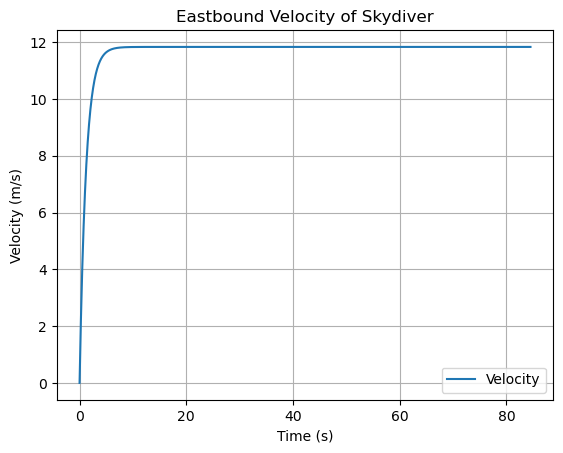

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
mass = 75  # kg
gravity = 9.8  # m/s^2
drag_coefficient = 1.75
effective_area = 5  # m^2
air_density = 1.2  # kg/m^3
initial_height = 500  # m
wind_speed = 100 / 3.6  # converting 100 km/h to m/s (1 m/s = 3.6 km/h)
falling_time = 84.5  # seconds

# Calculate terminal velocity
terminal_velocity = np.sqrt((2 * mass * gravity) / (drag_coefficient * effective_area * air_density))

# Calculate distance fallen and velocity over time
time_points = np.linspace(0, falling_time, num=1000)
velocity_points = terminal_velocity * (1 - np.exp(-time_points * (gravity / terminal_velocity)))

# Plotting velocity over time
plt.plot(time_points, velocity_points, label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Eastbound Velocity of Skydiver')
plt.legend()
plt.grid(True)
plt.show()


# Eastbound dsiplacement

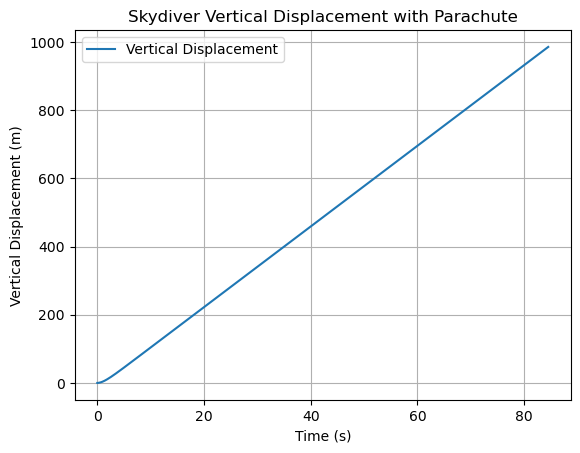

Total Eastbound Displacement: 2347.22 meters


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

# Given values
mass = 75  # kg
gravity = 9.8  # m/s^2
drag_coefficient = 1.75
effective_area = 5  # m^2
air_density = 1.2  # kg/m^3
initial_height = 500  # m
wind_speed = 100 / 3.6  # converting 100 km/h to m/s (1 m/s = 3.6 km/h)
falling_time = 84.5  # seconds

# Calculate terminal velocity
terminal_velocity = np.sqrt((2 * mass * gravity) / (drag_coefficient * effective_area * air_density))

# Calculate vertical velocity over time
time_points = np.linspace(0, falling_time, num=1000)
vertical_velocity_points = terminal_velocity * (1 - np.exp(-time_points * (gravity / terminal_velocity)))

# Integrate vertical velocity to get vertical displacement
vertical_displacement_points = cumtrapz(vertical_velocity_points, time_points, initial=0)

# Calculate horizontal displacement due to wind
horizontal_displacement_wind = wind_speed * time_points

# Total eastbound displacement
total_displacement_eastbound = horizontal_displacement_wind[-1]

# Plotting vertical displacement over time
plt.plot(time_points, vertical_displacement_points, label='Vertical Displacement')
plt.xlabel('Time (s)')
plt.ylabel('Vertical Displacement (m)')
plt.title('Skydiver Vertical Displacement with Parachute')
plt.legend()
plt.grid(True)
plt.show()

# Print total eastbound displacement
print(f'Total Eastbound Displacement: {total_displacement_eastbound:.2f} meters')
